In [ ]:
# Deck: 52 cards/ 13 ranks and 4 suits
# Card: rank + suit
# Pokerhand: 5 cards
# itertools.product: compute the combinations

In [1]:
import collections
import itertools
import random
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
RANK_LIST = ("2", "3", "4", "5", "6", "7", "8", "9", "10", "J", "Q", "K", "A")
SUIT_LIST = ("H", "S", "D", "C")
HAND_RANK = ("High-Card", "One-Pair", "Two-Pair", "3-of-a-Kind", "Straight",
             "Flush", "Full-House", "4-of-a-Kind", "Straight-Flush")

In [3]:
class Card:
    """
    Class that defines a particular card.  Each card has a rank and suit.
    """
    def __init__(self, rank, suit):
        self.rank = rank
        self.suit = suit
        self.card = self.rank, self.suit

    def __repr__(self):
        return self.rank + "-" + self.suit


class PokerHand:
    """
    Class that defines a poker hand.
    """
    def __init__(self, card_list):
        self.card_list = card_list

    def get_hand_rank(self):
        rank_dict = collections.defaultdict(int) 
        suit_dict = collections.defaultdict(int)
        for my_card in self.card_list:
            rank_dict[my_card.rank] += 1
            suit_dict[my_card.suit] += 1
        # Count the number of ranks and suits
        
        # check for poker hand
        hand_rank = HAND_RANK[0] # Treat all poker hands as high card and  change them later

        # check for one pair
        if len(rank_dict) == 4: # 4 types of ranks -> there are 2 cards in the same rank -> One Pair 
            hand_rank = HAND_RANK[1]
        # check for two pair or 3-of-a-kind
        elif len(rank_dict) == 3:
            if 3 in rank_dict.values(): # Three of one rank 
                hand_rank = HAND_RANK[3] 
            else:
                hand_rank = HAND_RANK[2] # Two pairs 
        # check for Full House or 4-of-a-kind
        elif len(rank_dict) == 2:
            if 2 in rank_dict.values(): # two types of ranks -> 4 of the same rank and one of another rank -> Four of A Kind
                hand_rank = HAND_RANK[6]
            else:
                hand_rank = HAND_RANK[7] #Full House
        else:
            # check for Flush and Straight
            straight, flush = False, False
            if len(suit_dict) == 1: # Only one type of suit -> Flush
                flush = True
            min_rank = min([RANK_LIST.index(x) for x in rank_dict.keys()])
            max_rank = max([RANK_LIST.index(x) for x in rank_dict.keys()])
            if int(max_rank) - int(min_rank) == 4:
                straight = True
            # see if Ace exists and can be low
            low_straight = set(("A", "2", "3", "4", "5"))
            if not set(rank_dict.keys()).difference(low_straight):
                straight = True
                
            if straight and not flush:
                hand_rank = HAND_RANK[4]
            elif flush and not straight:
                hand_rank = HAND_RANK[5]
            elif flush and straight:
                hand_rank = HAND_RANK[8]

        enumeration = ",".join([str(x) for x in self.card_list])
        return hand_rank, "{enumeration} ({hand_rank})".format(**locals())


class Deck(set):
    """
    Class that defines a standard deck of cards.  Each deck has the standard 52 cards, which
    consists of 13 ranks and 4 suits.  Class inherits from class set.
    """
    def __init__(self):
        """
        Generate a standard deck of cards and add to the set of cards.
        """
        for rank, suit in itertools.product(RANK_LIST, SUIT_LIST):
            self.add(Card(rank, suit))

    def get_card(self):
        """
        Return a card from the deck of cards.  This is accomplished by retrieving a random
        sample without replacement.  The chosen card is then removed from the deck.
        :return: Card
        """
        a_card = random.sample(self, 1)[0]
        self.remove(a_card)
        return a_card
            
    def remove_card(self, thecard):
        # Remove the dealt cards from the deck
        if thecard in self:
            self.remove(thecard)
        return thecard

    def get_hand(self, number_of_cards, dealt_cards=None):
        """
        Retrieve a poker hand which consists of five cards.
        :param number_of_cards: number of cards to retrieve.
        :return:
        """
        if number_of_cards == 5:
            return PokerHand([self.get_card() for x in range(number_of_cards)])
        else:
            hand = []
            for card in range(number_of_cards): # Get 3 cards from the remaining deck
                hand.append(self.get_card())
            hand.extend(dealt_cards) # Form a pokerhand by glueing the newly dealt 3 cards with first 2 cards dealt
            return PokerHand(hand) # Using previously defined method to identity the rank of my pokerhand
                





With 250000 poker hands dealt
Poker Hand   Probability
High-Card		4.7725e+01
One-Pair		4.3870e+01
Two-Pair		5.5156e+00
3-of-a-Kind		2.6256e+00
Straight		0.0000e+00
Flush		0.0000e+00
Full-House		2.2160e-01
4-of-a-Kind		4.2400e-02
Straight-Flush		0.0000e+00


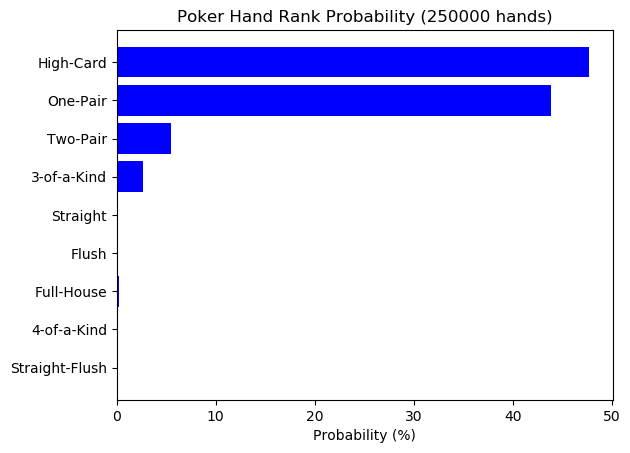

In [4]:
# mainline driver
first_card = Card("2", "H") # Suppose this is the first dealt card
second_card = Card("10", "D") # Suppose this is the second dealt card
number_of_hands = 250000

# Initialize the frequency dictionary
frequency_hand_rank = {}
for hand_rank in HAND_RANK:
    frequency_hand_rank[hand_rank] = 0  
for i in range(number_of_hands):
    deck = Deck()
    dealt_cards = []
    
    deck.remove_card(first_card) # Remove the first card, 51 cards remaining in the deck
    deck.remove_card(second_card) # Remove the second card, 51 cards remaining in the deck
    dealt_cards.append(first_card)
    dealt_cards.append(second_card) # Form the list of dealt cards
  
    hand_rank, details =deck.get_hand(3, dealt_cards).get_hand_rank()  
    frequency_hand_rank[hand_rank] += 1
    if hand_rank == HAND_RANK[8]:
        print(details)
for rank, count in frequency_hand_rank.items():
    frequency_hand_rank[rank] = count/number_of_hands*100.0

print("With " + str(number_of_hands) + " poker hands dealt")
print("Poker Hand   Probability")
for hand, prob in frequency_hand_rank.items():
    print(f"{hand}\t\t{prob:10.4e}")

# make plot
poker_hand_ranks = frequency_hand_rank.keys()
y_pos = np.arange(len(poker_hand_ranks))
frequency = tuple(frequency_hand_rank.values())

plt.rcdefaults()
fig, ax = plt.subplots()
ax.barh(y_pos, frequency, color='blue')
ax.set_yticks(y_pos)
ax.set_yticklabels(poker_hand_ranks)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel("Probability (%)")
ax.set_title("Poker Hand Rank Probability (" + str(number_of_hands) + " hands)")

plt.show()
